# Project 1 FYS-STK4155
### Trial run Kjersti

In [15]:
import pandas as pd
import matplotlib.style as mplstyle

from funcs import *

mplstyle.use(['ggplot', 'fast'])

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Part a) OLS for the Runge function

* OLS regression analysis using polynomials in x up to order 15 or higher. Add stochastic noise.
* Explore the dependence on the number of data points and the polynomial degree
* Evalute the MSE and R^2 scores. Plot them as functions of polynomial degree.
* Plot the parameters $\theta$ as you increase the order of the polynomial. Comment the results.
* You have to include a scaling/centering of the data.
* Present a critical discussion of why and how you have scaled the data.
* You have to split into test and training data.

In [16]:
n_vals = np.arange(10, 300, 20)  # number of data points
p_vals = np.arange(2, 16) # polynomial degrees 

In [17]:
results = []

for n in n_vals:
    x, y = make_data(n)

    for p in p_vals:
        X = polynomial_features(x, p)
        X, y = standardize(X, y)
        X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)

        theta = OLS_parameters(X_train, y_train)
        y_pred = X_test @ theta

        results.append({'n': n, 'p': p, 'theta': theta, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})

df_OLS = pd.DataFrame(results)

/Users/kjesta/Desktop/Masteremner/FYS-STK4155/Project_1_FYSSTK/Kjersti/funcs.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - (np.sum((y_data - y_pred)**2))/(np.sum((y_data - np.mean(y_data))**2))


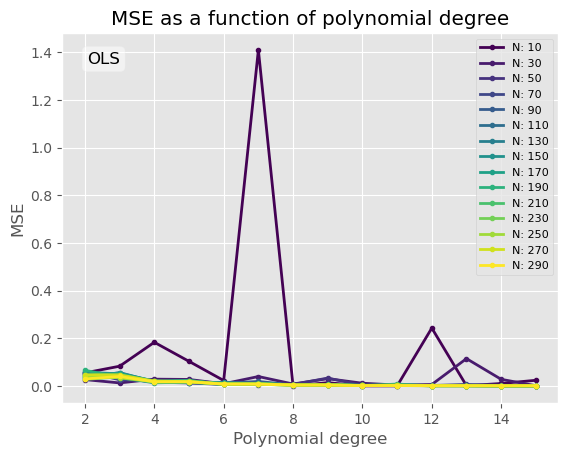

In [18]:
plot_mse_degree(df_OLS, n_vals, 'OLS')

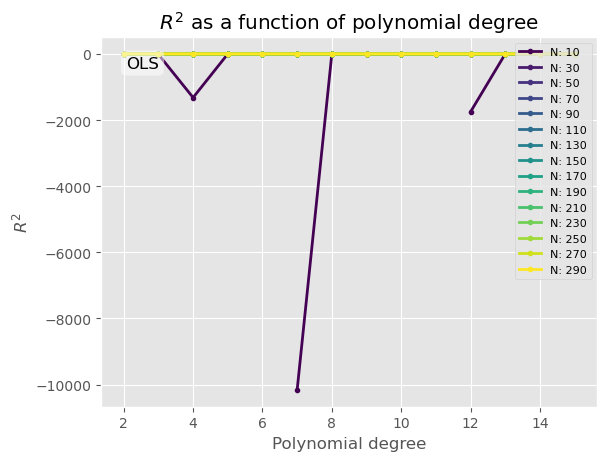

In [19]:
plot_R2_degree(df_OLS, n_vals, 'OLS')

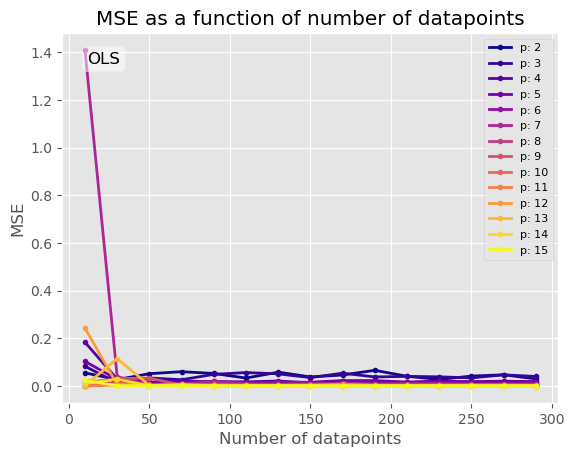

In [20]:
plot_mse_datapoints(df_OLS, p_vals, 'OLS')

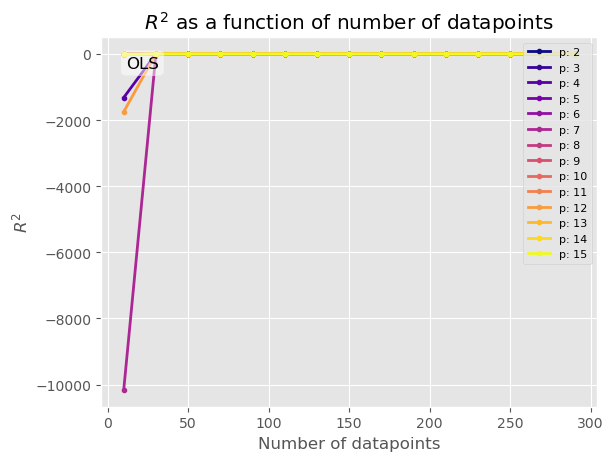

In [21]:
plot_R2_datapoints(df_OLS, p_vals, 'OLS')

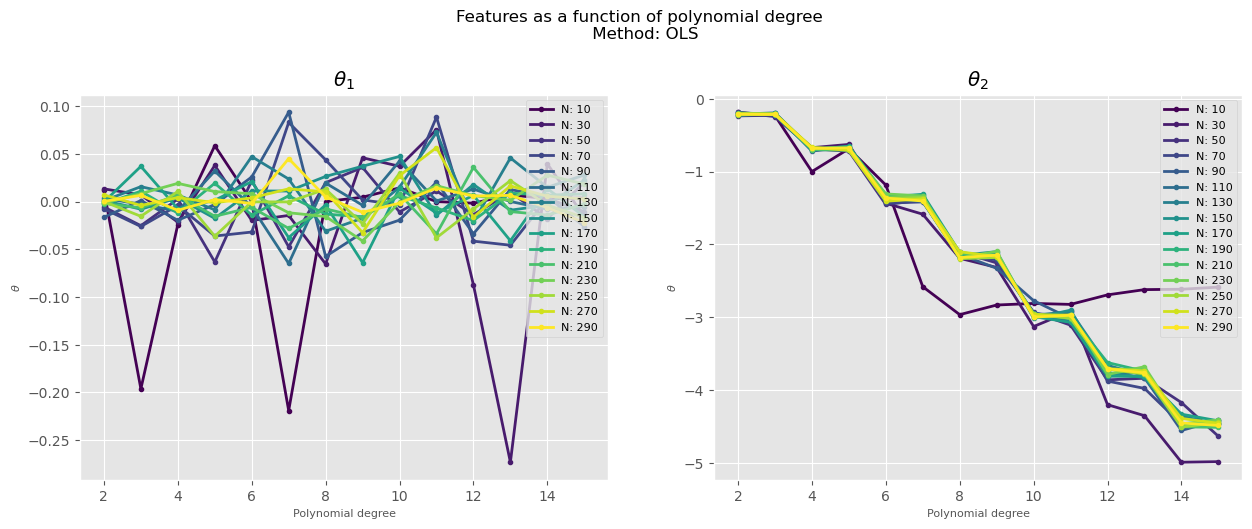

In [22]:
plot_theta_degree_intercept(df_OLS, n_vals, 'OLS')

#### Part b) Ridge regression analysis for the Runge function

In [29]:
lambdas = np.logspace(-4, 2, 15)

In [30]:
results = []

for n in n_vals:
    x, y = make_data(n)

    for p in p_vals:
        for l in lambdas:
            X = polynomial_features(x, p, intercept=False)
            X, y = standardize(X, y)
            X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)

            theta = Ridge_parameters(X_train, y_train)
            y_pred = X_test @ theta

            results.append({'n': n, 'p': p, 'theta': theta, 'lambda': l, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})

df_Ridge = pd.DataFrame(results)

/Users/kjesta/Desktop/Masteremner/FYS-STK4155/Project_1_FYSSTK/Kjersti/funcs.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - (np.sum((y_data - y_pred)**2))/(np.sum((y_data - np.mean(y_data))**2))


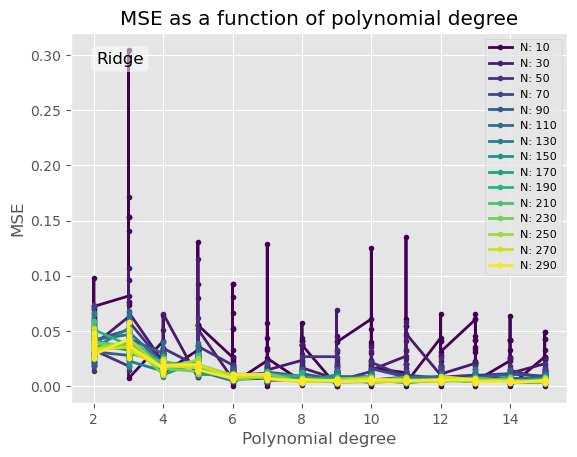

In [31]:
plot_mse_degree(df_Ridge, n_vals, 'Ridge')

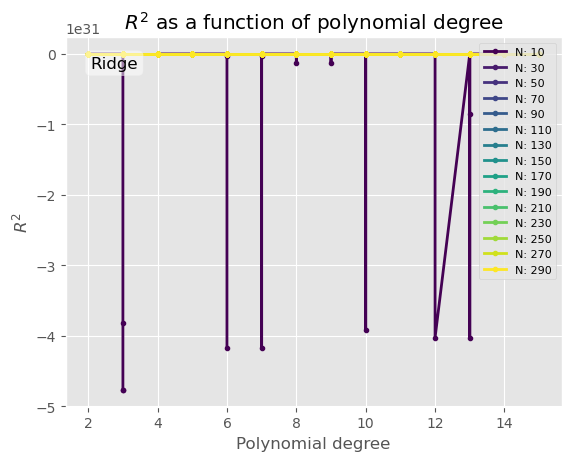

In [32]:
plot_R2_degree(df_Ridge, n_vals, 'Ridge')

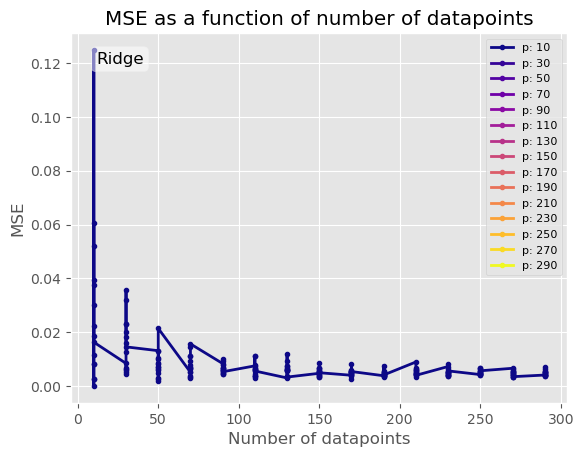

In [33]:
plot_mse_datapoints(df_Ridge, n_vals, 'Ridge')

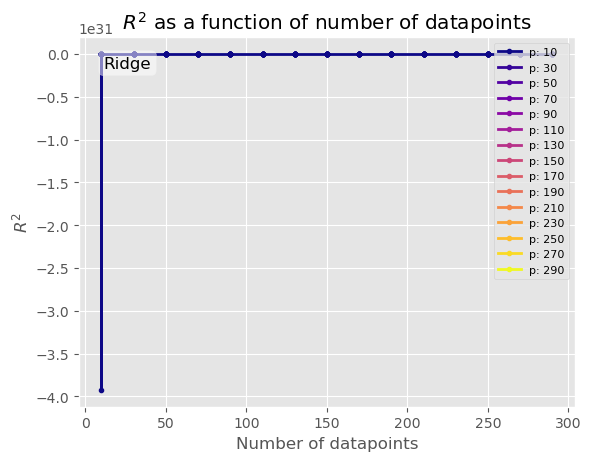

In [34]:
plot_R2_datapoints(df_Ridge, n_vals, 'Ridge')

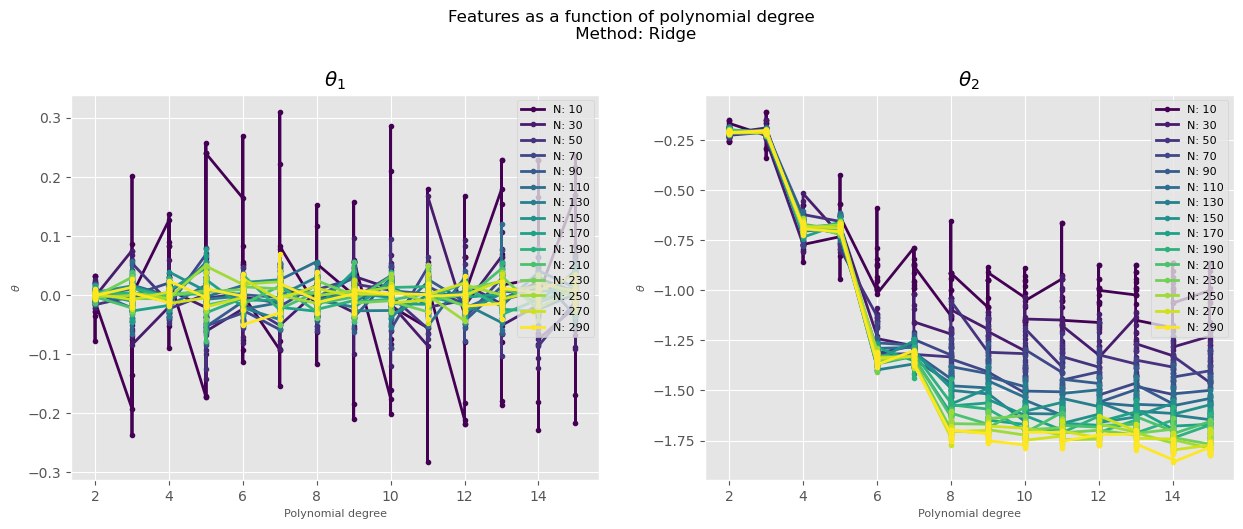

In [35]:
plot_theta_degree_no_intercept(df_Ridge, n_vals, 'Ridge')